In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [21]:
openai_bleu_scores = np.array([
    0.08345929049496298, 0.09081046231184015, 0.09387686034802312, 0.10723903655661904,
    0.12395172333497059, 0.09443376499563326, 0.07118619037347591, 0.0728491122081149,
    0.1300945967836984, 0.08380702184531547, 0.07395097179058872, 0.06608287069896968,
    0.09035635876726168, 0.08763188412951581, 0.08538201791428814, 0.10481265329564927,
    0.08185382010063295, 0.09804913856550972, 0.06466536561061625, 0.07108662064853463,
    0.11144362177484864, 0.08988061448206915, 0.10811234950803626, 0.07931249102320848,
    0.07464027856137272, 0.09371788731003766, 0.10660692586373406, 0.07639457982697768,
    0.1191625863103727, 0.09729236033568787, 0.07805017189516816, 0.15466426632134483,
    0.08051008377904013, 0.08561126681396482, 0.07184575210003966, 0.08148331663276637,
    0.0985855941149336, 0.08623626662582232, 0.07518847439403878, 0.08199203609657145,
    0.11014389315658646, 0.06130090541613979, 0.09083529271098684, 0.06921948194088974,
    0.1270048240888903, 0.09246133453323574, 0.07238395558766973, 0.06751872875249593,
    0.08817287446300687, 0.08817242519915806
])

claude_bleu_scores = np.array([
    0.1084239986708035, 0.10431649740234773, 0.11700288335623833, 0.11020839936196918,
    0.09725086124178259, 0.1127342893945364, 0.1175743544969575, 0.088942063157121,
    0.0979897157130814, 0.11094507015375545, 0.09805325533435641, 0.09189160906720414,
    0.09506322024090486, 0.1122248973851654, 0.1161234428761859, 0.08975953139832675,
    0.11505247588877861, 0.0892315721636694, 0.10924348575876139, 0.10631510068696959,
    0.1041450353208132, 0.09019672260372696, 0.113122340064504, 0.0964715662800749,
    0.10108054601570085, 0.11918027206857638, 0.09443561241363303, 0.11351054582278361,
    0.08239996227992251, 0.09805151647753407, 0.1099166010725486, 0.08986947782283121,
    0.10791458877498362, 0.09747184356346869, 0.106157884667617, 0.09582741054886272,
    0.10198604998665335, 0.10398705574879949, 0.11531806747475444, 0.10597995374326674,
    0.1047574897094937, 0.11783896885037279, 0.10293712793645558, 0.09800546607929782,
    0.10928790785424058, 0.10564377915579468, 0.10119278677168153, 0.11348300396363066,
    0.09497158798475211, 0.11446489800635
])

gemini_bleu_scores = np.array([
    0.07190081706908322, 0.09758907807992717, 0.11901063671011566, 0.09741084799766925,
    0.13232391745292713, 0.11579017288188292, 0.07263372871842542, 0.0952461919712046,
    0.0832463304837489, 0.0805360591339052, 0.08798572074840659, 0.11504399258857513,
    0.10068563803312233, 0.08806985272372311, 0.08592044731214782, 0.12064531824151206,
    0.07520519437278224, 0.11715468667230362, 0.13875494871133998, 0.10507426815727863,
    0.10388205218640663, 0.09493128864124475, 0.11355376596253713, 0.1198088376877946,
    0.1055923990508679, 0.13147027886410012, 0.09949639454654677, 0.0958478988958404,
    0.09392916424553842, 0.0938549333776281, 0.11109956989053116, 0.11889932588089247,
    0.09029146661698004, 0.0919723284460686, 0.09966757701895326, 0.09983017335818423,
    0.08147238000858441, 0.09827994540918075, 0.1316411600217805, 0.11064241544514287,
    0.10779377738293515, 0.1241210791452826, 0.09048781838056537, 0.11793481779339683,
    0.11550524435323878, 0.10293537154335178, 0.10766474985324156, 0.08554698967398248,
    0.07640052976246146, 0.12930577594149478
])

openai_rouge_scores = np.array([
    0.5197215777262182, 0.5185185185185185, 0.4677804295942721, 0.5172413793103449,
    0.5375302663438256, 0.510948905109489, 0.4868735083532219, 0.5327102803738317,
    0.503562945368171, 0.5393258426966292, 0.509090909090909, 0.5010989010989011,
    0.47533632286995514, 0.4878048780487805, 0.5190476190476191, 0.5209302325581394,
    0.49624060150375937, 0.49009900990099015, 0.48444444444444446, 0.48470588235294115,
    0.5139186295503213, 0.5352112676056338, 0.5199063231850117, 0.45000000000000007,
    0.5114155251141552, 0.49760765550239233, 0.4578947368421052, 0.5199063231850117,
    0.5, 0.47912087912087914, 0.506726457399103, 0.5089974293059125, 0.5011933174224342,
    0.5191873589164786, 0.48395061728395067, 0.5303030303030303, 0.5196850393700787,
    0.5098039215686274, 0.5176991150442479, 0.5117370892018779, 0.5060827250608273,
    0.49471458773784355, 0.5011820330969268, 0.4716157205240175, 0.47146401985111663,
    0.5239179954441914, 0.517814726840855, 0.509719222462203
])

claude_rouge_scores = np.array([
    0.4834123222748815, 0.4655581947743468, 0.49880095923261397, 0.492822966507177,
    0.4922394678492239, 0.5400000000000001, 0.5036674816625917, 0.5, 0.5, 0.47858942065491183,
    0.4566210045662101, 0.48801742919389973, 0.5138888888888888, 0.4666666666666666,
    0.519607843137255, 0.4899777282850779, 0.5508684863523574, 0.46478873239436624,
    0.47139588100686497, 0.49519230769230765, 0.4940047961630695, 0.4494949494949495,
    0.48325358851674644, 0.472972972972973, 0.48210023866348445, 0.49746192893401014,
    0.49107142857142855, 0.4738154613466334, 0.47413793103448276, 0.5011709601873536,
    0.5, 0.4721030042918455, 0.458128078817734, 0.5011086474501109, 0.5342465753424658,
    0.49090909090909096, 0.5161290322580645, 0.5361305361305361, 0.47642679900744417,
    0.4794188861985472, 0.4988344988344988, 0.4926108374384236, 0.45605700712589076,
    0.48444444444444446, 0.5187032418952618, 0.5, 0.502262443438914, 0.4324324324324324,
    0.5034642032332562, 0.457286432160804
])

gemini_rouge_scores = np.array([
    0.5154185022026431, 0.5193798449612403, 0.5342163355408388, 0.540045766590389,
    0.5503355704697988, 0.5487528344671202, 0.49090909090909096, 0.4962025316455696,
    0.4914933837429112, 0.49557522123893805, 0.5075921908893709, 0.5227272727272728,
    0.5320197044334974, 0.5956521739130435, 0.5555555555555556, 0.5071090047393365,
    0.5206073752711496, 0.5309734513274336, 0.559090909090909, 0.5294117647058825,
    0.537313432835821, 0.5339168490153173, 0.5194174757281553, 0.5750000000000001,
    0.5020576131687243, 0.5420560747663551, 0.5552941176470588, 0.49115913555992147,
    0.5347368421052632, 0.55, 0.5739910313901346, 0.5467289719626168, 0.5561224489795918,
    0.5274725274725275, 0.5065502183406113, 0.5520169851380043, 0.5249999999999999,
    0.4893203883495145, 0.5543237250554324, 0.5508684863523574, 0.5286343612334801,
    0.5100671140939597, 0.5357142857142857, 0.5539906103286384, 0.5276381909547739,
    0.5607064017660044, 0.5446428571428571, 0.5085470085470086, 0.49612403100775193,
    0.5176991150442479
])

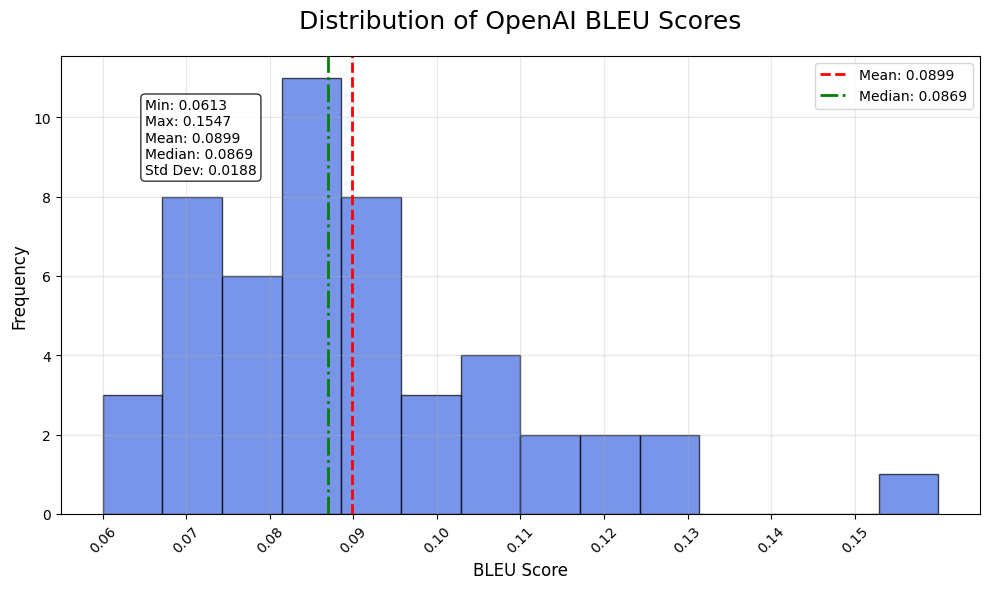

In [22]:
# Create the figure and axis
plt.figure(figsize=(10, 6))

# Create histogram
bins = np.linspace(0.06, 0.16, 15)  # Create 15 bins spanning the range of data
plt.hist(openai_bleu_scores, bins=bins, color='royalblue', edgecolor='black', alpha=0.7)

# Add vertical line for mean
mean_score = np.mean(openai_bleu_scores)
plt.axvline(x=mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.4f}')

# Add vertical line for median
median_score = np.median(openai_bleu_scores)
plt.axvline(x=median_score, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_score:.4f}')

# Add labels and title
plt.xlabel('BLEU Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of OpenAI BLEU Scores', fontsize=18, pad=20)

# Add grid and legend
plt.grid(alpha=0.3)
plt.legend()

# Customize ticks
plt.xticks(np.arange(0.06, 0.16, 0.01), rotation=45)

# Add summary statistics as text
stats_text = (f'Min: {np.min(openai_bleu_scores):.4f}\n'
              f'Max: {np.max(openai_bleu_scores):.4f}\n'
              f'Mean: {mean_score:.4f}\n'
              f'Median: {median_score:.4f}\n'
              f'Std Dev: {np.std(openai_bleu_scores):.4f}')

plt.figtext(0.15, 0.70, stats_text, fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

# Adjust layout and display
plt.tight_layout()
plt.show()

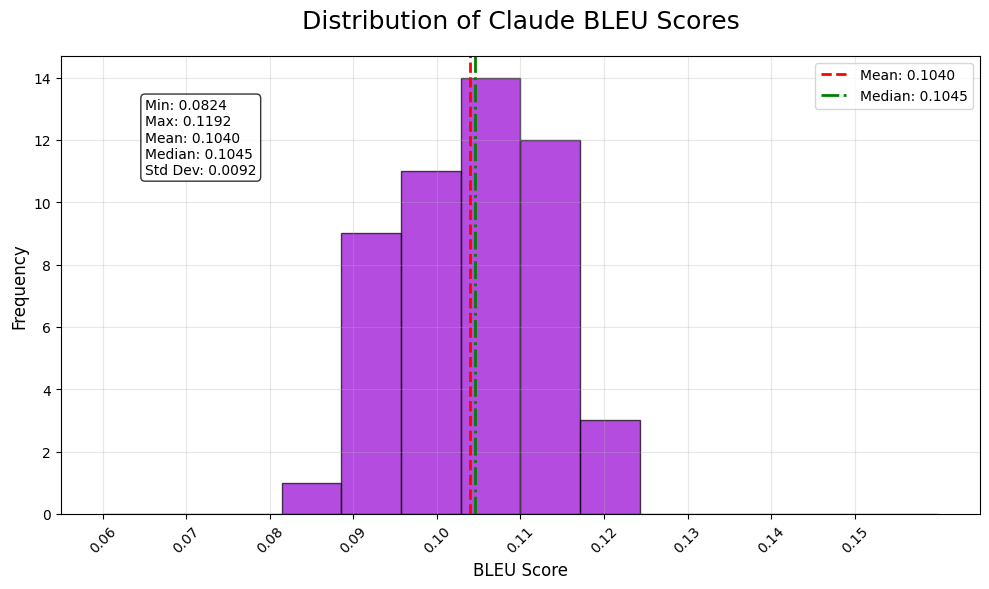

In [23]:
# Create the figure and axis
plt.figure(figsize=(10, 6))

# Create histogram
bins = np.linspace(0.06, 0.16, 15)  # Create 15 bins spanning the range of data
plt.hist(claude_bleu_scores, bins=bins, color='darkviolet', edgecolor='black', alpha=0.7)

# Add vertical line for mean
mean_score = np.mean(claude_bleu_scores)
plt.axvline(x=mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.4f}')

# Add vertical line for median
median_score = np.median(claude_bleu_scores)
plt.axvline(x=median_score, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_score:.4f}')

# Add labels and title
plt.xlabel('BLEU Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Claude BLEU Scores', fontsize=18, pad=20)

# Add grid and legend
plt.grid(alpha=0.3)
plt.legend()

# Customize ticks
plt.xticks(np.arange(0.06, 0.16, 0.01), rotation=45)

# Add summary statistics as text
stats_text = (f'Min: {np.min(claude_bleu_scores):.4f}\n'
              f'Max: {np.max(claude_bleu_scores):.4f}\n'
              f'Mean: {mean_score:.4f}\n'
              f'Median: {median_score:.4f}\n'
              f'Std Dev: {np.std(claude_bleu_scores):.4f}')

plt.figtext(0.15, 0.70, stats_text, fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

# Adjust layout and display
plt.tight_layout()
plt.show()

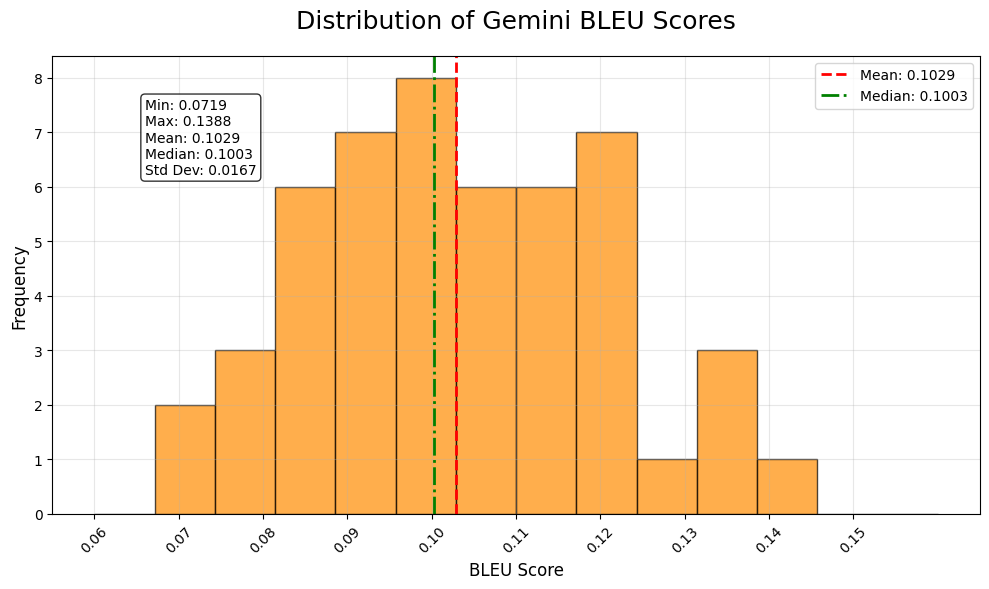

In [24]:
# Create the figure and axis
plt.figure(figsize=(10, 6))

# Create histogram
bins = np.linspace(0.06, 0.16, 15)  # Create 15 bins spanning the range of data
plt.hist(gemini_bleu_scores, bins=bins, color='darkorange', edgecolor='black', alpha=0.7)

# Add vertical line for mean
mean_score = np.mean(gemini_bleu_scores)
plt.axvline(x=mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.4f}')

# Add vertical line for median
median_score = np.median(gemini_bleu_scores)
plt.axvline(x=median_score, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_score:.4f}')

# Add labels and title
plt.xlabel('BLEU Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Gemini BLEU Scores', fontsize=18, pad=20)

# Add grid and legend
plt.grid(alpha=0.3)
plt.legend()

# Customize ticks
plt.xticks(np.arange(0.06, 0.16, 0.01), rotation=45)

# Add summary statistics as text
stats_text = (f'Min: {np.min(gemini_bleu_scores):.4f}\n'
              f'Max: {np.max(gemini_bleu_scores):.4f}\n'
              f'Mean: {mean_score:.4f}\n'
              f'Median: {median_score:.4f}\n'
              f'Std Dev: {np.std(gemini_bleu_scores):.4f}')

plt.figtext(0.15, 0.70, stats_text, fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

# Adjust layout and display
plt.tight_layout()
plt.show()

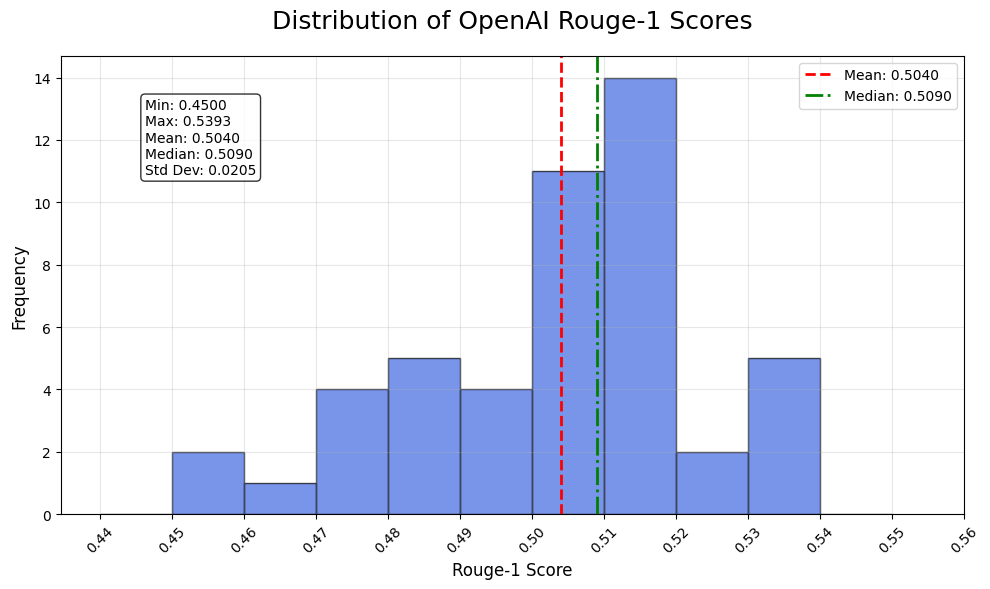

In [25]:
# Create the figure and axis
plt.figure(figsize=(10, 6))

# Create histogram
bins = np.linspace(0.44, 0.55, 12)  # 12 bins from 0.44 to 0.55
plt.hist(openai_rouge_scores, bins=bins, color='royalblue', edgecolor='black', alpha=0.7)

# Add vertical line for mean
mean_score = np.mean(openai_rouge_scores)
plt.axvline(x=mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.4f}')

# Add vertical line for median
median_score = np.median(openai_rouge_scores)
plt.axvline(x=median_score, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_score:.4f}')

# Add labels and title with increased padding
plt.xlabel('Rouge-1 Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of OpenAI Rouge-1 Scores', fontsize=18, pad=20)

# Add grid and legend
plt.grid(alpha=0.3)
plt.legend()

# Customize ticks
plt.xticks(np.arange(0.44, 0.56, 0.01), rotation=45)

# Add summary statistics as text
stats_text = (f'Min: {np.min(openai_rouge_scores):.4f}\n'
              f'Max: {np.max(openai_rouge_scores):.4f}\n'
              f'Mean: {mean_score:.4f}\n'
              f'Median: {median_score:.4f}\n'
              f'Std Dev: {np.std(openai_rouge_scores):.4f}')

plt.figtext(0.15, 0.70, stats_text, fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

# Adjust layout and display
plt.tight_layout()
plt.show()

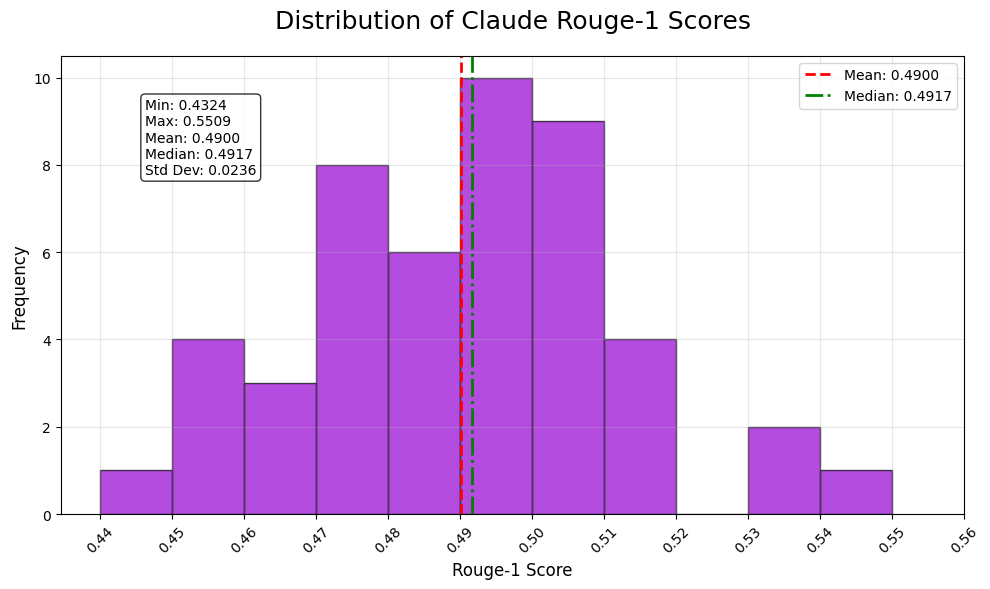

In [26]:
# Create the figure and axis
plt.figure(figsize=(10, 6))

# Create histogram
bins = np.linspace(0.44, 0.55, 12)  # 12 bins from 0.44 to 0.55
plt.hist(claude_rouge_scores, bins=bins, color='darkviolet', edgecolor='black', alpha=0.7)

# Add vertical line for mean
mean_score = np.mean(claude_rouge_scores)
plt.axvline(x=mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.4f}')

# Add vertical line for median
median_score = np.median(claude_rouge_scores)
plt.axvline(x=median_score, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_score:.4f}')

# Add labels and title with increased padding
plt.xlabel('Rouge-1 Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Claude Rouge-1 Scores', fontsize=18, pad=20)

# Add grid and legend
plt.grid(alpha=0.3)
plt.legend()

# Customize ticks
plt.xticks(np.arange(0.44, 0.56, 0.01), rotation=45)

# Add summary statistics as text
stats_text = (f'Min: {np.min(claude_rouge_scores):.4f}\n'
              f'Max: {np.max(claude_rouge_scores):.4f}\n'
              f'Mean: {mean_score:.4f}\n'
              f'Median: {median_score:.4f}\n'
              f'Std Dev: {np.std(claude_rouge_scores):.4f}')

plt.figtext(0.15, 0.70, stats_text, fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

# Adjust layout and display
plt.tight_layout()
plt.show()

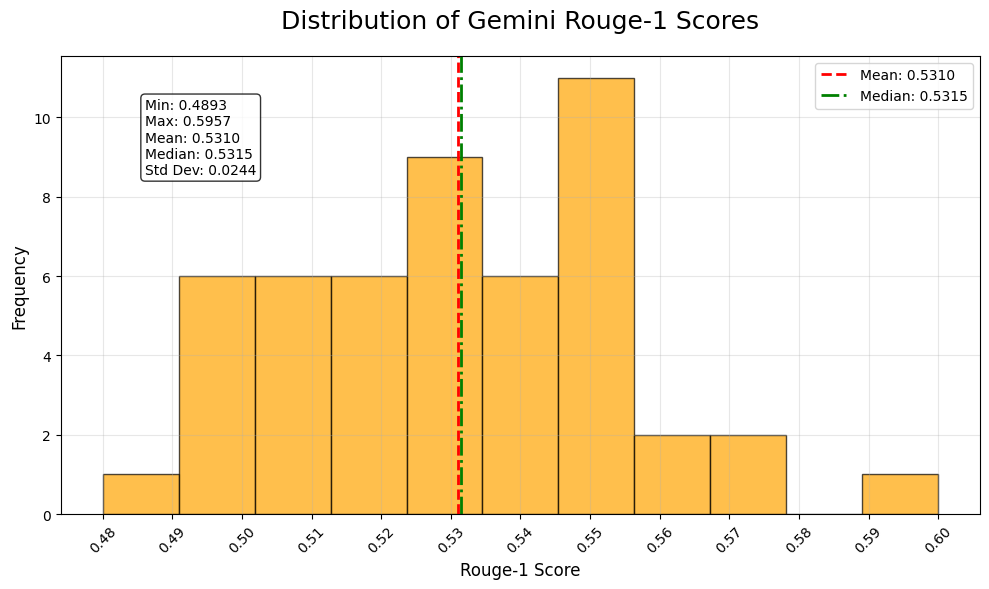

In [27]:
plt.figure(figsize=(10, 6))

# Create histogram
bins = np.linspace(0.48, 0.60, 12)  # 12 bins from 0.48 to 0.60
plt.hist(gemini_rouge_scores, bins=bins, color='orange', edgecolor='black', alpha=0.7)

# Add vertical line for mean
mean_score = np.mean(gemini_rouge_scores)
plt.axvline(x=mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.4f}')

# Add vertical line for median
median_score = np.median(gemini_rouge_scores)
plt.axvline(x=median_score, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_score:.4f}')

# Add labels and title with increased padding
plt.xlabel('Rouge-1 Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Gemini Rouge-1 Scores', fontsize=18, pad=20)

# Add grid and legend
plt.grid(alpha=0.3)
plt.legend()

# Customize ticks
plt.xticks(np.arange(0.48, 0.61, 0.01), rotation=45)

# Add summary statistics as text
stats_text = (f'Min: {np.min(gemini_rouge_scores):.4f}\n'
              f'Max: {np.max(gemini_rouge_scores):.4f}\n'
              f'Mean: {mean_score:.4f}\n'
              f'Median: {median_score:.4f}\n'
              f'Std Dev: {np.std(gemini_rouge_scores):.4f}')

plt.figtext(0.15, 0.70, stats_text, fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

# Adjust layout and display
plt.tight_layout()
plt.show()

In [35]:
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

In [29]:
all_scores = np.concatenate([openai_bleu_scores, gemini_bleu_scores, claude_bleu_scores])
group_labels = np.repeat(['OpenAI', 'Gemini', 'Claude'], [len(openai_bleu_scores), len(gemini_bleu_scores), len(claude_bleu_scores)])

# Create DataFrame
data = pd.DataFrame({
    'score': all_scores,
    'group': group_labels
})

In [30]:
# 1. Test for normality within each group (Shapiro-Wilk test)
for group_name, group_data in data.groupby('group'):
    stat, p = stats.shapiro(group_data['score'])
    print(f"Shapiro-Wilk test for {group_name}: p-value = {p}")
    if p < 0.05:
        print(f"  Warning: The {group_name} group may not be normally distributed")

Shapiro-Wilk test for Claude: p-value = 0.1725662623471635
Shapiro-Wilk test for Gemini: p-value = 0.6096780785623458
Shapiro-Wilk test for OpenAI: p-value = 0.003687096408294767


In [32]:
# 2. Test for homogeneity of variances (Levene's test)
levene_stat, levene_p = stats.levene(openai_bleu_scores, gemini_bleu_scores, claude_bleu_scores)
print(f"Levene's test for homogeneity of variances: p-value = {levene_p}")
if levene_p < 0.05:
    print("  Warning: The variances may not be equal across groups")

Levene's test for homogeneity of variances: p-value = 0.0018238227167153651


In [34]:
h_stat, h_p = stats.kruskal(openai_bleu_scores, gemini_bleu_scores, claude_bleu_scores)
print(f"Kruskal-Wallis H test: p-value = {h_p}")
if h_p < 0.05:
  	print("Significant!!")

Kruskal-Wallis H test: p-value = 2.557468348291569e-06
Significant!!
